In [112]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


### Importing modules

In [113]:
! pip install seaborn

In [114]:
! pip install xgboost

In [115]:
! pip install lightgbm

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor

In [117]:
from sklearn.linear_model import Lasso,OrthogonalMatchingPursuit
from sklearn.linear_model import Ridge,GammaRegressor,HuberRegressor
from sklearn.linear_model import LinearRegression,PoissonRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor,HistGradientBoostingRegressor,AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

### Defining data Directory

In [118]:
train_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
sample_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")

### Insights of Data and Data preprocessing
* Includes Visualization
* Includes Handling of Null Values
* May Includes Removing of Unecessary Columns

In [119]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [120]:
print(len(train_data))
print(list(train_data.isnull().sum()))

1460
[0, 0, 0, 259, 0, 0, 1369, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 0, 0, 0, 37, 37, 38, 37, 0, 38, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 690, 81, 81, 81, 0, 0, 81, 81, 0, 0, 0, 0, 0, 0, 0, 1453, 1179, 1406, 0, 0, 0, 0, 0, 0]


In [121]:
train_data.columns[train_data.isnull().sum()>500]

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [122]:
print(train_data.Fence.unique())
print(train_data.Fence.isnull().sum())

print(train_data.Alley.unique())
print(train_data.Alley.isnull().sum())

print(train_data.FireplaceQu.unique())
print(train_data.FireplaceQu.isnull().sum())

print(train_data.MiscFeature.unique())
print(train_data.MiscFeature.isnull().sum())

print(train_data.PoolQC.unique())
print(train_data.PoolQC.isnull().sum())

[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
1179
[nan 'Grvl' 'Pave']
1369
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
690
[nan 'Shed' 'Gar2' 'Othr' 'TenC']
1406
[nan 'Ex' 'Fa' 'Gd']
1453


In [123]:
train_data = train_data.drop(columns=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'])

In [124]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [125]:
print(train_data.columns[train_data.isnull().sum()>50])

Index(['LotFrontage', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')


In [126]:
train_data.LotFrontage.unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [127]:
print(train_data.columns[train_data.nunique() == 1])

Index([], dtype='object')


In [128]:
print(train_data.GarageYrBlt.unique())

[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.]


In [129]:
print(train_data.GarageFinish.unique())

['RFn' 'Unf' 'Fin' nan]


In [130]:
print(train_data.GarageQual.unique())

['TA' 'Fa' 'Gd' nan 'Ex' 'Po']


In [131]:
print(train_data.GarageCond.unique())

['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


In [132]:
print(train_data.GarageType.mode())
print("")
print(train_data.GarageType.mode()[0])
print("")
print(train_data.GarageFinish.mode())
print("")
print(train_data.GarageFinish.mode()[0])
print("")
print(train_data.GarageQual.mode())
print("")
print(train_data.GarageQual.mode()[0])
print("")
print(train_data.GarageCond.mode())
print("")
print(train_data.GarageCond.mode()[0])

0    Attchd
dtype: object

Attchd

0    Unf
dtype: object

Unf

0    TA
dtype: object

TA

0    TA
dtype: object

TA


### For doing all the tasks at Once
`for i in train_data.columns:
    if train_data[i].dtype == np.float:
        train_data[i].fillna(train_data[i].median(),inplace=True)
    elif train_data[i].dtype == 'object':
        train_data[i].fillna(train_data[i].mode()[0],inplace=True)
    elif train_data[i].isnull().sum() > 500:
        train_data.drop(columns=[i],axis=1)`

In [133]:
for i in train_data.columns:
    if train_data[i].isnull().sum() > 0 and train_data[i].dtype == np.float:
        train_data[i].fillna(train_data[i].median(),inplace=True)
    elif train_data[i].isnull().sum() > 0 and train_data[i].dtype == 'object':
        train_data[i].fillna(train_data[i].mode()[0],inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias f

In [134]:
train_data.isnull().sum().sum()

0

In [135]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [136]:
len(train_data)

1460

### Applying Label Encoding
Label Encoding those features having Categorical Object dtype values

In [137]:
label_encoder = LabelEncoder()

In [138]:
for i in train_data.columns:
    if train_data[i].dtype == 'object':
        train_data[i] = label_encoder.fit_transform(train_data[i])

In [139]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000


In [140]:
train_data.SaleType.unique()

array([8, 6, 0, 3, 4, 1, 5, 2, 7])

In [141]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000


In [142]:
train_data.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,3.028767,69.863699,10516.828082,0.995890,1.942466,2.777397,0.000685,3.019178,...,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,7.513014,3.770548,180921.195890
std,421.610009,42.300571,0.632017,22.027677,9981.264932,0.063996,1.409156,0.707666,0.026171,1.622634,...,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,1.552100,1.100854,79442.502883
min,1.000000,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,365.750000,20.000000,3.000000,60.000000,7553.500000,1.000000,0.000000,3.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,129975.000000
50%,730.500000,50.000000,3.000000,69.000000,9478.500000,1.000000,3.000000,3.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,163000.000000
75%,1095.250000,70.000000,3.000000,79.000000,11601.500000,1.000000,3.000000,3.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,214000.000000
max,1460.000000,190.000000,4.000000,313.000000,215245.000000,1.000000,3.000000,3.000000,1.000000,4.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


### Similar Preprocessing on Test Dataset

In [143]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [144]:
for j in test_data.columns:
    if test_data[j].isnull().sum()>500:
        test_data = test_data.drop(columns=[j],axis=1)
    elif test_data[j].isnull().sum() > 0 and test_data[j].dtype == 'object':
        test_data[j].fillna(test_data[j].mode()[0],inplace=True)
    elif test_data[j].isnull().sum() > 0 and test_data[j].dtype == np.float:
        test_data[j].fillna(test_data[j].median(),inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias f

In [145]:
test_data.isnull().sum().sum()

0

In [146]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [147]:
for j in test_data.columns:
    if test_data[j].dtype == 'object':
        test_data[j] = label_encoder.fit_transform(test_data[j])

In [148]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622,1,3,3,0,4,...,0,0,0,120,0,0,6,2010,8,4
1,1462,20,3,81.0,14267,1,0,3,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,1463,60,3,74.0,13830,1,0,3,0,4,...,34,0,0,0,0,0,3,2010,8,4
3,1464,60,3,78.0,9978,1,0,3,0,4,...,36,0,0,0,0,0,6,2010,8,4
4,1465,120,3,43.0,5005,1,0,1,0,4,...,82,0,0,144,0,0,1,2010,8,4


In [149]:
test_data.shape,train_data.shape

((1459, 75), (1460, 76))

### Plotting Few features (EDA)

In [150]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000


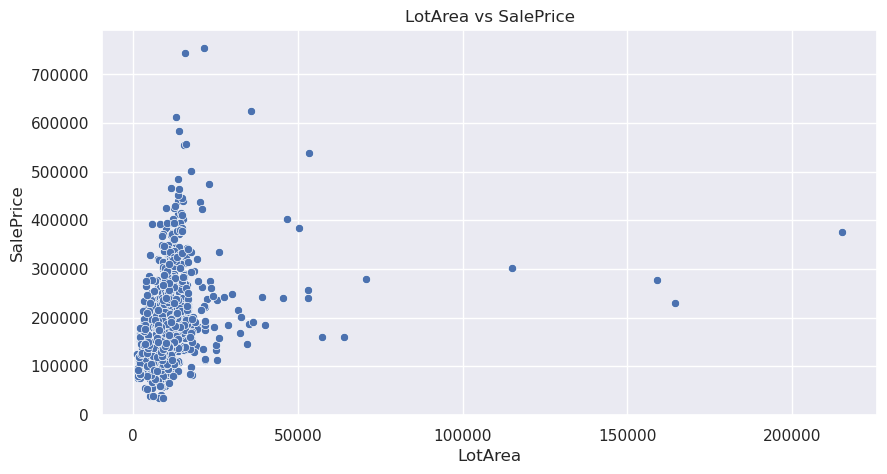

In [151]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.scatterplot(x='LotArea',y='SalePrice',data=train_data).set(title='LotArea vs SalePrice')

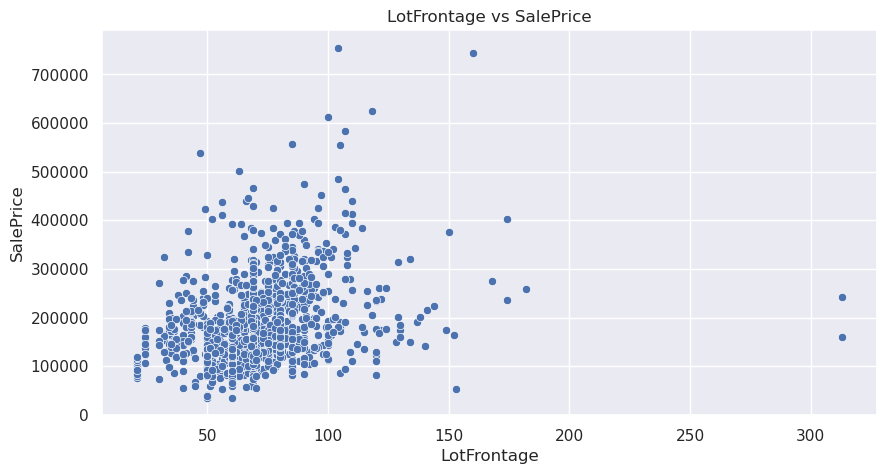

In [152]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.scatterplot(x='LotFrontage',y='SalePrice',data=train_data).set(title='LotFrontage vs SalePrice')

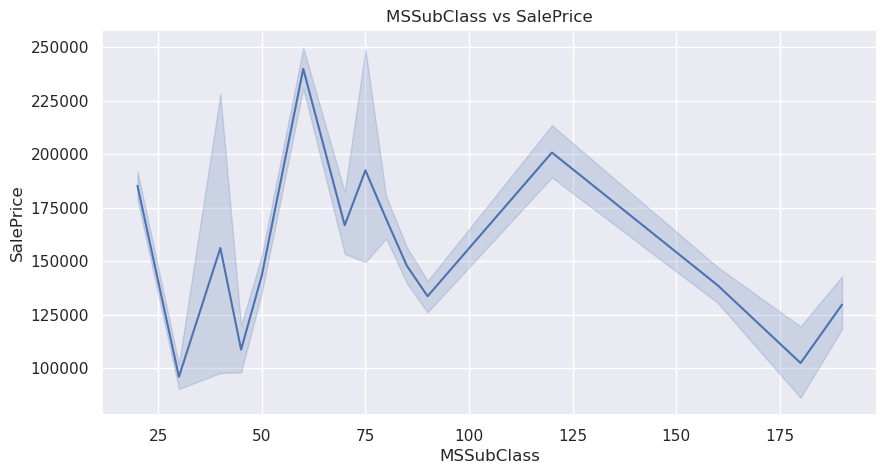

In [153]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.lineplot(x='MSSubClass',y='SalePrice',data=train_data).set(title='MSSubClass vs SalePrice')

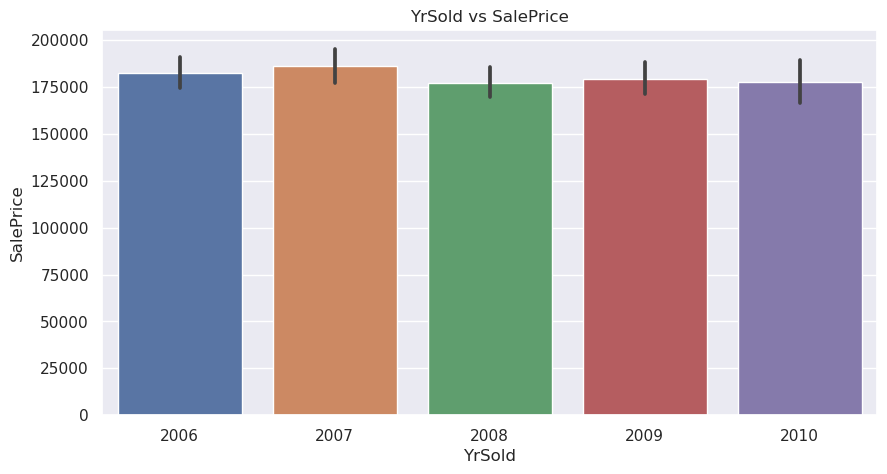

In [154]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.barplot(x='YrSold',y='SalePrice',data=train_data).set(title='YrSold vs SalePrice')

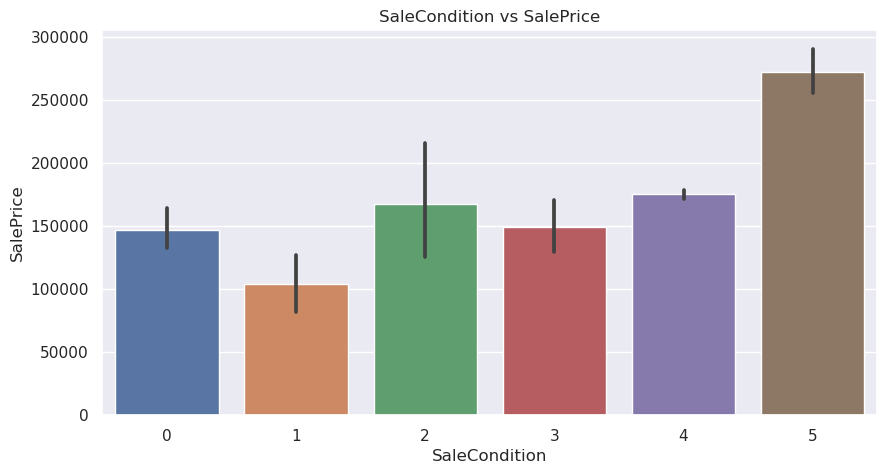

In [155]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.barplot(x='SaleCondition',y='SalePrice',data=train_data).set(title='SaleCondition vs SalePrice')

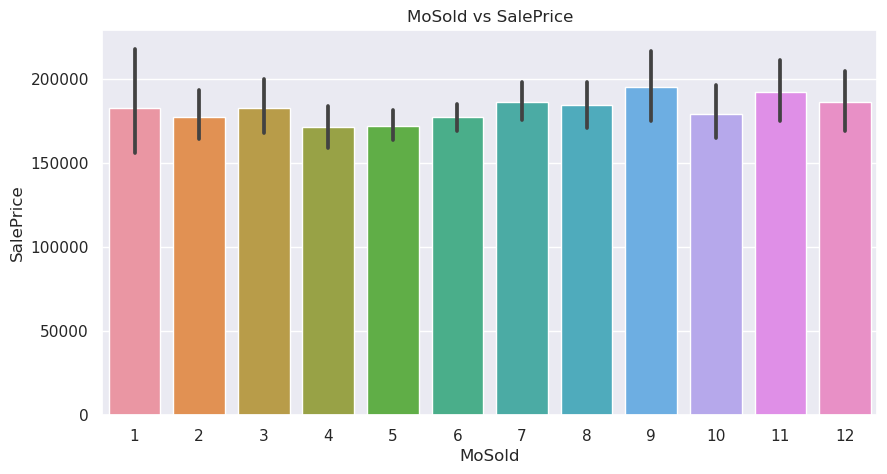

In [156]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.barplot(x='MoSold',y='SalePrice',data=train_data).set(title='MoSold vs SalePrice')

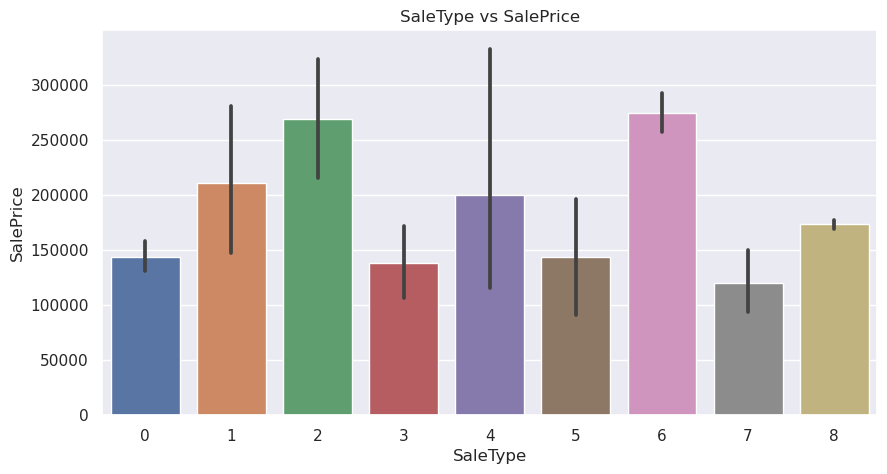

In [157]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.barplot(x="SaleType",y="SalePrice",data=train_data).set(title="SaleType vs SalePrice")

### Model Preparation and Model Fitting

** The commented Codes are for finding best spliting of data **

In [158]:
train_data.select_dtypes(include=['object','category']).columns

Index([], dtype='object')

In [159]:
def evaluation(y,predictions):
    mae = mean_absolute_error(y,predictions)
    mse = mean_squared_error(y,predictions)
    rmse = np.sqrt(mean_squared_error(y,predictions))
    return mae,mse,rmse

In [160]:
train_data.Neighborhood.unique()

array([ 5, 24,  6, 15, 11, 21, 14, 17,  3, 19, 16, 12, 20,  9, 10,  7, 23,
        8, 22,  4, 13,  0,  2, 18,  1])

In [161]:
X,Y=train_data.drop(columns=['Id','SalePrice']),train_data['SalePrice']
test_X = test_data.drop(columns=['Id'])

### Applying Standard Scaler

In [162]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [163]:
X

array([[ 0.07337496, -0.04553194, -0.22087509, ...,  0.13877749,
         0.31386709,  0.2085023 ],
       [-0.87256276, -0.04553194,  0.46031974, ..., -0.61443862,
         0.31386709,  0.2085023 ],
       [ 0.07337496, -0.04553194, -0.08463612, ...,  0.13877749,
         0.31386709,  0.2085023 ],
       ...,
       [ 0.30985939, -0.04553194, -0.1754621 , ...,  1.64520971,
         0.31386709,  0.2085023 ],
       [-0.87256276, -0.04553194, -0.08463612, ...,  1.64520971,
         0.31386709,  0.2085023 ],
       [-0.87256276, -0.04553194,  0.23325479, ...,  0.13877749,
         0.31386709,  0.2085023 ]])

### Support Vector Regressor

In [164]:
# prev_rmse = float("inf")
# best_split_idx = 0
# for i in range(1000):
#     X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=i,test_size=0.2)
#     svr = SVR()
#     svr.fit(X_train,Y_train)
#     ypred = svr.predict(X_test)
#     acc = r2_score(Y_test,ypred)
#     mae,mse,rmse = evaluation(Y_test,ypred)
#     if rmse < prev_rmse:
#         prev_rmse = rmse
#         best_split_idx = i
# print(prev_rmse,best_split_idx) 

In [165]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=799,test_size=0.2)
svr = SVR()
svr.fit(X_train,Y_train)
ypred = svr.predict(X_test)
acc = r2_score(Y_test,ypred)
mae,mse,rmse = evaluation(Y_test,ypred)
print("r_squared :",acc)
print("")
print("rmse :",rmse)
print("")
print("mse :",mse)
print("")
print("mae :",mae)

r_squared : -0.009759963067626831

rmse : 62841.9195402978

mse : 3949106851.509262

mae : 46879.936043753274


### Linear Regression

In [166]:
# prev_rmse = float("inf")
# best_split_idx = 0
# for i in range(1000):
#     X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=i,test_size=0.2)
#     lin_reg = LinearRegression()
#     lin_reg.fit(X_train,Y_train)
#     ypred1 = lin_reg.predict(X_test)
#     acc1 = r2_score(Y_test,ypred1)
#     mae,mse,rmse = evaluation(Y_test,ypred1)
#     if rmse < prev_rmse:
#         prev_rmse = rmse
#         best_split_idx = i
# print(prev_rmse,best_split_idx) 

In [167]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=804,test_size=0.2)
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)
ypred1 = lin_reg.predict(X_test)
acc1 = r2_score(Y_test,ypred1)
mae,mse,rmse = evaluation(Y_test,ypred1)
print("r_squared :",acc1)
print("")
print("rmse :",rmse)
print("")
print("mse :",mse)
print("")
print("mae :",mae)

r_squared : 0.8947624260669695

rmse : 21171.44478595717

mse : 448230074.324833

mae : 16157.503637704232


### Lasso Regression

In [168]:
# prev_rmse = float("inf")
# best_split_idx = 0
# for i in range(1000):
#     X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=i,test_size=0.2)
#     lasso = Lasso()
#     lasso.fit(X_train,Y_train)
#     ypred2 = lasso.predict(X_test)
#     acc2 = r2_score(Y_test,ypred2)
#     mae,mse,rmse = evaluation(Y_test,ypred2)
#     if rmse < prev_rmse:
#         prev_rmse = rmse
#         best_split_idx = i
# print(prev_rmse,best_split_idx) 

In [169]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=804,test_size=0.2)
lasso = Lasso()
lasso.fit(X_train,Y_train)
ypred2 = lasso.predict(X_test)
acc2 = r2_score(Y_test,ypred2)
mae,mse,rmse = evaluation(Y_test,ypred2)
print("r_squared :",acc2)
print("")
print("rmse :",rmse)
print("")
print("mse :",mse)
print("")
print("mae :",mae)

r_squared : 0.8948986190305672

rmse : 21157.740862575367

mse : 447649998.40789145

mae : 16146.841915018607


### Ridge Regression

In [170]:
# prev_rmse = float("inf")
# best_split_idx = 0
# for i in range(1000):
#     X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=i,test_size=0.2)
#     ridge = Ridge()
#     ridge.fit(X_train,Y_train)
#     ypred3 = ridge.predict(X_test)
#     acc3 = r2_score(Y_test,ypred3)
#     mae,mse,rmse = evaluation(Y_test,ypred3)
#     if rmse < prev_rmse:
#         prev_rmse = rmse
#         best_split_idx = i
# print(prev_rmse,best_split_idx) 

In [171]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=804,test_size=0.2)
ridge = Ridge()
ridge.fit(X_train,Y_train)
ypred3 = lasso.predict(X_test)
acc3 = r2_score(Y_test,ypred3)
mae,mse,rmse = evaluation(Y_test,ypred3)
print("r_squared :",acc3)
print("")
print("rmse :",rmse)
print("")
print("mse :",mse)
print("")
print("mae :",mae)

r_squared : 0.8948986190305672

rmse : 21157.740862575367

mse : 447649998.40789145

mae : 16146.841915018607


### XGBOOST Regressor

In [172]:
# prev_rmse = float("inf")
# best_split_idx = 0
# for i in range(1000):
#     X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=i,test_size=0.2)
#     xgb = XGBRegressor()
#     xgb.fit(X_train,Y_train)
#     ypred4 = xgb.predict(X_test)
#     acc4 = r2_score(Y_test,ypred4)
#     mae,mse,rmse = evaluation(Y_test,ypred4)
#     if rmse < prev_rmse:
#         prev_rmse = rmse
#         best_split_idx = i
# print(prev_rmse,best_split_idx) 

In [173]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=565,test_size=0.2)
xgb = XGBRegressor()
xgb.fit(X_train,Y_train)
ypred4 = xgb.predict(X_test)
acc4 = r2_score(Y_test,ypred4)
mae,mse,rmse = evaluation(Y_test,ypred4)
print("r_squared :",acc4)
print("")
print("rmse :",rmse)
print("")
print("mse :",mse)
print("")
print("mae :",mae)

r_squared : 0.9229682886285606

rmse : 20484.787112266924

mse : 419626503.0348971

mae : 15018.441834332192


### Poission Regressor

In [174]:
# prev_rmse = float("inf")
# best_split_idx = 0
# for i in range(2000):
#     X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=i,test_size=0.2)
#     poisson = PoissonRegressor()
#     poisson.fit(X_train,Y_train)
#     ypred5 = poisson.predict(X_test)
#     acc5 = r2_score(Y_test,ypred5)
#     mae,mse,rmse = evaluation(Y_test,ypred5)
#     if rmse < prev_rmse:
#         prev_rmse = rmse
#         best_split_idx = i
# print(prev_rmse,best_split_idx) 

In [175]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=804,test_size=0.2)
poisson = PoissonRegressor()
poisson.fit(X_train,Y_train)
ypred5 = poisson.predict(X_test)
acc5 = r2_score(Y_test,ypred5)
mae,mse,rmse = evaluation(Y_test,ypred5)
print("r_squared :",acc5)
print("")
print("rmse :",rmse)
print("")
print("mse :",mse)
print("")
print("mae :",mae)

r_squared : 0.9115611302842712

rmse : 19408.263246239578

mse : 376680682.23533404

mae : 14462.87124934638


### Gradient Boosting Regressor

In [177]:
# prev_rmse = float("inf")
# best_split_idx = 0
# for i in range(2000):
#     X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=i,test_size=0.2)
#     gbr = GradientBoostingRegressor(alpha=0.9, criterion='squared_error', max_depth=100,max_leaf_nodes=7, min_samples_leaf=4,n_estimators=250)
#     gbr.fit(X_train,Y_train)
#     ypred6 = gbr.predict(X_test)
#     acc6 = r2_score(Y_test,ypred6)
#     mae,mse,rmse = evaluation(Y_test,ypred6)
#     if rmse < prev_rmse:
#         prev_rmse = rmse
#         best_split_idx = i
# print(prev_rmse,best_split_idx) 

17084.504881487217 1182


In [104]:
np.random.seed(1182)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1182,test_size=0.2) # Did it for 2000 epochs
gbr = GradientBoostingRegressor(alpha=0.9, criterion='squared_error', max_depth=100,max_leaf_nodes=7, min_samples_leaf=4,n_estimators=250)
gbr.fit(X_train,Y_train)
ypred6 = gbr.predict(X_test)
acc6 = r2_score(Y_test,ypred6)
mae,mse,rmse = evaluation(Y_test,ypred6)
print("r_squared :",acc6)
print("")
print("rmse :",rmse)
print("")
print("mse :",mse)
print("")
print("mae :",mae)

r_squared : 0.945329147662488

rmse : 17070.401406371206

mse : 291398604.17464

mae : 12240.778835994586


### KNeighbours Regressor

In [67]:
# prev_rmse = float("inf")
# best_split_idx = 0
# for i in range(1000):
#     X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=i,test_size=0.2)
#     knr = KNeighborsRegressor()
#     knr.fit(X_train,Y_train)
#     ypred7 = knr.predict(X_test)
#     acc7 = r2_score(Y_test,ypred7)
#     mae,mse,rmse = evaluation(Y_test,ypred7)
#     if rmse < prev_rmse:
#         prev_rmse = rmse
#         best_split_idx = i
# print(prev_rmse,best_split_idx) 

25952.707154072934 804


In [68]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=804,test_size=0.2)
knr = KNeighborsRegressor()
knr.fit(X_train,Y_train)
ypred7 = knr.predict(X_test)
acc7 = r2_score(Y_test,ypred7)
mae,mse,rmse = evaluation(Y_test,ypred7)
print("r_squared :",acc7)
print("")
print("rmse :",rmse)
print("")
print("mse :",mse)
print("")
print("mae :",mae)

r_squared : 0.841862391152522

rmse : 25952.707154072934

mse : 673543008.6250684

mae : 18546.352739726026


### Gamma Regressor

In [69]:
# prev_rmse = float("inf")
# best_split_idx = 0
# for i in range(1000):
#     X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=i,test_size=0.2)
#     gmr = GammaRegressor()
#     gmr.fit(X_train,Y_train)
#     ypred8 = gmr.predict(X_test)
#     acc8 = r2_score(Y_test,ypred8)
#     mae,mse,rmse = evaluation(Y_test,ypred8)
#     if rmse < prev_rmse:
#         prev_rmse = rmse
#         best_split_idx = i
# print(prev_rmse,best_split_idx) 

20190.090069220358 804


In [70]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=804,test_size=0.2)
gmr = GammaRegressor()
gmr.fit(X_train,Y_train)
ypred8 = gmr.predict(X_test)
acc8 = r2_score(Y_test,ypred8)
mae,mse,rmse = evaluation(Y_test,ypred8)
print("r_squared :",acc8)
print("")
print("rmse :",rmse)
print("")
print("mse :",mse)
print("")
print("mae :",mae)

r_squared : 0.9042924171798664

rmse : 20190.090069220358

mse : 407639737.0032306

mae : 14422.668236691004


### Hist Gradient Boosting Regressor

In [54]:
# prev_rmse = float("inf")
# best_split_idx = 0
# for i in range(2000):
#     X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=i,test_size=0.2)
#     hgb = HistGradientBoostingRegressor()
#     hgb.fit(X_train,Y_train)
#     ypred9 = hgb.predict(X_test)
#     acc9 = r2_score(Y_test,ypred9)
#     mae,mse,rmse = evaluation(Y_test,ypred9)
#     if rmse < prev_rmse:
#         prev_rmse = rmse
#         best_split_idx = i
# print(prev_rmse,best_split_idx)

18286.203890049535 1344


In [57]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1344,test_size=0.2)
hgb = HistGradientBoostingRegressor()
hgb.fit(X_train,Y_train)
ypred9 = hgb.predict(X_test)
acc9 = r2_score(Y_test,ypred9)
mae,mse,rmse = evaluation(Y_test,ypred9)
print("r_squared :",acc9)
print("")
print("rmse :",rmse)
print("")
print("mse :",mse)
print("")
print("mae :",mae)

r_squared : 0.9253843011803468

rmse : 18286.203890049535

mse : 334385252.7084628

mae : 12529.988404050158


### Orthogonal Matching Pursuit

In [59]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [96]:
# prev_rmse = float("inf")
# best_split_idx = 0
# for i in range(1000):
#     X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=i,test_size=0.2)
#     oth = OrthogonalMatchingPursuit()
#     oth.fit(X_train,Y_train)
#     ypred13 = oth.predict(X_test)
#     acc13 = r2_score(Y_test,ypred13)
#     mae,mse,rmse = evaluation(Y_test,ypred13)
#     if rmse < prev_rmse:
#         prev_rmse = rmse
#         best_split_idx = i
# print(prev_rmse,best_split_idx)

24640.388977612005 804


In [94]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=804,test_size=0.2)
oth = OrthogonalMatchingPursuit()
oth.fit(X_train,Y_train)
ypred13 = oth.predict(X_test)
acc13 = r2_score(Y_test,ypred13)
mae,mse,rmse = evaluation(Y_test,ypred13)
print("r_squared :",acc9)
print("")
print("rmse :",rmse)
print("")
print("mse :",mse)
print("")
print("mae :",mae)

r_squared : 0.9253843011803468

rmse : 24640.388977612005

mse : 607148768.9680232

mae : 18617.170739223748


### Submission Task

In [77]:
sample_data.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [105]:
test_sc = sc.fit_transform(test_data.drop(columns=['Id'],axis=1))
prediction = gbr.predict(test_sc)

In [106]:
prediction

array([123336.46848907, 170489.94121324, 186796.79361731, ...,
       172166.95433289, 128026.60244223, 239583.03941911])

In [107]:
ids = test_data['Id']

In [108]:
ids

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [109]:
final_sub = pd.DataFrame({"Id":ids,"SalePrice":prediction})

In [110]:
final_sub

,Id,SalePrice
0,1461,123336.468489
1,1462,170489.941213
2,1463,186796.793617
3,1464,194760.214574
4,1465,178645.242841
...,...,...
1454,2915,83001.848212
1455,2916,80831.259937
1456,2917,172166.954333
1457,2918,128026.602442


In [111]:
final_sub.to_csv("submission.csv",index=False)